In [173]:
import pandas as pd
import os
import networkx
import seaborn as sns
import matplotlib.pyplot as plt

from ndlib.models.epidemics.IndependentCascadesModel import IndependentCascadesModel
import ndlib.models.epidemics as ep
from ndlib.models.ModelConfig import Configuration

from tqdm.auto import tqdm
import numpy as np


In [6]:
gr = pd.read_csv(os.path.join('data', 'graph.csv'))

In [7]:
gr

,published,title,summary,doi,primary_category,pdf_url,no_authors,source,target
0,2016-03-28 06:38:56+00:00,Hierarchy of Groups Evaluation Using Different...,The paper presents a cursory examination of cl...,10.1007/978-3-662-49381-6_63,cs.CV,http://arxiv.org/pdf/1603.08323v1,3,M. Spytkowski,L. Olech
1,2016-03-28 06:38:56+00:00,Hierarchy of Groups Evaluation Using Different...,The paper presents a cursory examination of cl...,10.1007/978-3-662-49381-6_63,cs.CV,http://arxiv.org/pdf/1603.08323v1,3,M. Spytkowski,H. Kwasnicka
2,2016-03-28 06:38:56+00:00,Hierarchy of Groups Evaluation Using Different...,The paper presents a cursory examination of cl...,10.1007/978-3-662-49381-6_63,cs.CV,http://arxiv.org/pdf/1603.08323v1,3,L. Olech,H. Kwasnicka
3,2016-06-17 21:21:15+00:00,Hierarchical Data Generator based on Tree-Stru...,Object Cluster Hierarchies is a new variant of...,NaN,cs.CV,http://arxiv.org/pdf/1606.05681v3,4,L. Olech,M. Spytkowski
4,2016-06-17 21:21:15+00:00,Hierarchical Data Generator based on Tree-Stru...,Object Cluster Hierarchies is a new variant of...,NaN,cs.CV,http://arxiv.org/pdf/1606.05681v3,4,L. Olech,H. Kwasnicka
...,...,...,...,...,...,...,...,...,...
813,2021-08-03 21:53:31+00:00,HTTP2vec: Embedding of HTTP Requests for Detec...,Hypertext transfer protocol (HTTP) is one of t...,NaN,cs.LG,http://arxiv.org/pdf/2108.01763v1,4,M. Gniewkowski,T. Surmacz
814,2021-08-03 21:53:31+00:00,HTTP2vec: Embedding of HTTP Requests for Detec...,Hypertext transfer protocol (HTTP) is one of t...,NaN,cs.LG,http://arxiv.org/pdf/2108.01763v1,4,M. Gniewkowski,W. Walentynowicz
815,2021-08-03 21:53:31+00:00,HTTP2vec: Embedding of HTTP Requests for Detec...,Hypertext transfer protocol (HTTP) is one of t...,NaN,cs.LG,http://arxiv.org/pdf/2108.01763v1,4,H. Maciejewski,T. Surmacz
816,2021-08-03 21:53:31+00:00,HTTP2vec: Embedding of HTTP Requests for Detec...,Hypertext transfer protocol (HTTP) is one of t...,NaN,cs.LG,http://arxiv.org/pdf/2108.01763v1,4,H. Maciejewski,W. Walentynowicz


In [10]:
ge = networkx.convert_matrix.from_pandas_edgelist(email_gra_pd, create_using=networkx.MultiGraph())

In [33]:
list(reversed(sorted(networkx.closeness_centrality(ge).items(), key=lambda x: x[1])))[:10]

[('P. Kazienko', 0.43738977072310403),
 ('T. Kajdanowicz', 0.43538339562804396),
 ('P. Brodka', 0.40217618748692197),
 ('R. Michalski', 0.388990082979154),
 ('J. Jankowski', 0.358164453761938),
 ('B. Szymanski', 0.35023461345724566),
 ('K. Musial', 0.34894698620188813),
 ('M. Piasecki', 0.3426483041404822),
 ('L. Augustyniak', 0.3426483041404822),
 ('R. Bartusiak', 0.3261635060031394)]

In [48]:
from networkx.drawing.layout import spring_layout

In [ ]:
# pr_erg = networkx.algorithms.link_analysis.pagerank_alg.pagerank(ge)
labels = ['P. Kazienko', 'J. Pawelczyk']
labels = {x: x for x in labels}
plt.figure(figsize=(12,12)) 

networkx.draw(ge, node_size=15, with_labels = False)
nx.draw_networkx_labels(ge,spring_layout(ge), labels,font_size=16,font_color='r')
plt.show()

In [43]:
import networkx as nx
import numpy as np





def IC(Networkx_Graph,Seed_Set,Probability,Num_of_Simulations):
    spread = []
    for i in range(Num_of_Simulations):
        
        new_active, Ans = Seed_Set[:], Seed_Set[:]
        while new_active:
            #Getting neighbour nodes of newly activate node
            targets = Neighbour_finder(Networkx_Graph,Probability,new_active)
    
            #Calculating if any nodes of those neighbours can be activated, if yes add them to new_ones.
            np.random.seed(i)
            success = np.random.uniform(0,1,len(targets)) < Probability
            new_ones = list(np.extract(success, sorted(targets)))
            
            #Checking which ones in new_ones are not in our Ans...only adding them to our Ans so that no duplicate in Ans.
            new_active = list(set(new_ones) - set(Ans))
            Ans += new_active
            
        spread.append(len(Ans))
        
    return(np.mean(spread))
    
    
    
def Neighbour_finder(g,p,new_active):
    
    targets = []
    for node in new_active:
        targets += g.neighbors(node)

    return(targets)


def KempeGreedy(graph, num_seed_nodes, prob=0.2, n_iters=1000):
   #Solution gives 2 parameters: the selected seed set for which we found the maximum influence & their influences
   #Here we used this method for Networkx Directed Graph
    max_spreads = []
    ultimate_seed_set = []
    for _ in range(num_seed_nodes):
        best_node = -999
        best_spread = -np.inf

       
        nods = graph.nodes - ultimate_seed_set;


        
        for node in nods:
            print(ultimate_seed_set+[node])
            each_infl  = IC(graph, ultimate_seed_set + [node], prob, n_iters)
            if each_infl  > best_spread:
                ALL_inf.append(each_infl)
                best_spread = each_infl 
                best_node = node
                
        ultimate_seed_set.append(best_node)
        max_spreads.append(best_spread)
    return ultimate_seed_set, max_spreads

In [63]:
# KempeGreedy(ge, ['P. Kazienko', 'T. Kajdanowicz'], 0.3, 1000)
ALL_inf=[]
KempeGreedy(ge, 10, 0.3, 1000)

['W. Liu']
['B. V']
['Z. Michalewicz']
['M. Zolnieruk']
['B. Koloszczyk']
['M. Morzy']
['B. Szymanski']
['P. Oleszczyk']
['A. Borg']
['E. Kosasih']
['E. Kanaga']
['L. Zhao']
['K. Meissner']
['Z. Lalak']
['K. Gorman']
['A. Krakovska']
['A. Polak']
['N. Chawla']
['J. Pawelczyk']
['I. Gisterek']
['M. Ujma']
['J. Cabezas']
['P. Bielak']
['G. Miebs']
['J. Gaworecki']
['K. Kowalska']
['M. Przewozniczek']
['E. Sessolo']
['M. Szymanski']
['H. Kwasnicka']
['J. Ethier']
['W. Walentynowicz']
['V. Halyan']
['S. Yankielowicz']
['P. Zelasko']
['P. Doskocz']
['A. Rusin']
['T. Surmacz']
['V. Yukhymchuk']
['I. Ivashchenko']
['M. Rizoiu']
['N. Garau']
['N. Bisagno']
['T. Filipowski']
['K. Ozga']
['I. Olekseyuk']
['P. Gramacki']
['J. Banaszczak']
['P. Rozewski']
['M. Gniewkowski']
['R. Bartusiak']
['A. Chmiel']
['P. Brodka']
['J. Jankowski']
['M. Skoryk']
['X. Wang']
['A. Zbieg']
['M. Nikolajuk']
['S. Utz']
['K. Juszczyszyn']
['S. Zhao']
['W. Michalska']
['M. Holecyova']
['T. Arvanitis']
['Y. Ran']
['S. 

['P. Kazienko', 'J. Pawelczyk', 'A. Polak']
['P. Kazienko', 'J. Pawelczyk', 'N. Chawla']
['P. Kazienko', 'J. Pawelczyk', 'I. Gisterek']
['P. Kazienko', 'J. Pawelczyk', 'M. Ujma']
['P. Kazienko', 'J. Pawelczyk', 'J. Cabezas']
['P. Kazienko', 'J. Pawelczyk', 'P. Bielak']
['P. Kazienko', 'J. Pawelczyk', 'G. Miebs']
['P. Kazienko', 'J. Pawelczyk', 'J. Gaworecki']
['P. Kazienko', 'J. Pawelczyk', 'K. Kowalska']
['P. Kazienko', 'J. Pawelczyk', 'M. Przewozniczek']
['P. Kazienko', 'J. Pawelczyk', 'E. Sessolo']
['P. Kazienko', 'J. Pawelczyk', 'M. Szymanski']
['P. Kazienko', 'J. Pawelczyk', 'H. Kwasnicka']
['P. Kazienko', 'J. Pawelczyk', 'J. Ethier']
['P. Kazienko', 'J. Pawelczyk', 'W. Walentynowicz']
['P. Kazienko', 'J. Pawelczyk', 'V. Halyan']
['P. Kazienko', 'J. Pawelczyk', 'S. Yankielowicz']
['P. Kazienko', 'J. Pawelczyk', 'P. Zelasko']
['P. Kazienko', 'J. Pawelczyk', 'P. Doskocz']
['P. Kazienko', 'J. Pawelczyk', 'A. Rusin']
['P. Kazienko', 'J. Pawelczyk', 'T. Surmacz']
['P. Kazienko', 'J. Pa

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'M. Przewozniczek']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'E. Sessolo']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'M. Szymanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'H. Kwasnicka']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'J. Ethier']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'W. Walentynowicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'V. Halyan']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'S. Yankielowicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'P. Zelasko']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'P. Doskocz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'A. Rusin']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'T. Surmacz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'V. Yukhymchuk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'I. Ivashchenko']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'M. Rizoiu']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'N. Garau']
['P. Kazienko', 'J. Pawelczyk', 'M.

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'M. Zolnieruk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'B. Koloszczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'M. Morzy']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'B. Szymanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'P. Oleszczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'A. Borg']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'E. Kosasih']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'E. Kanaga']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'L. Zhao']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Meissner']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'Z. Lalak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Gorman']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'A. Krakovska']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'A. Polak']
['P. Kaz

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'B. Gliwa']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Jedryka']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'M. Mcgilchrist']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'Y. Gule']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Skibicki']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'J. Kwiatkowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'R. Radwanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'R. Michalski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'J. Grobelny']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'A. Zygmunt']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'W. Karwowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'T. Jelinski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'P. Tishchenko']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'P. J

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'M. Holecyova']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'T. Arvanitis']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'Y. Ran']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'S. Cheong']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'M. Dziezyc']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'P. Dziurzanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'M. Paradowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'Y. Carmiel']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'H. Budacova']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'M. Koziarski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'R. Suszek']
['P. Kazienko', 'J. Pawe

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'Z. Ropka']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'M. Kulisiewicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'O. Aharony']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'G. Ragozini']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'B. Zak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'W. Liu']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'B. V']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'Z. Michalewicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'M. Zolnieruk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'B. Koloszczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Ole

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'M. Bernaczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'N. Conci']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'X. Sumba']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'W. Indyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'P. Myszkowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'A. Binding']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'K. Kersting']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'K. Kania']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'H. Maciejewski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Ja

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'B. Zak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'W. Liu']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'B. V']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'Z. Michalewicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'M. Zolnieruk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'B. Koloszczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'M. Morzy']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'B. Szymanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'P. Oleszczyk

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'N. Dehak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'M. Boldt']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'J. Kuraszkiewicz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'M. Bernaczyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'N. Conci']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'X. Sumba']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'W. Indyk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'P. Myszkowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zha

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'B. Delaney']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'A. Burgun']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'T. Jia']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'P. Stawiak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'K. Tagowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'J. Hamari']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'A. Dziadek']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'Z. Ropka']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'M. 

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'X. Wang']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Zbieg']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'M. Nikolajuk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'S. Utz']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'K. Juszczyszyn']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'W. Michalska']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'M. Holecyova']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jaku

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'M. Mcgilchrist']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'Y. Gule']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'K. Skibicki']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'J. Kwiatkowski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'R. Radwanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'R. Michalski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'J. Grobelny']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai'

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'G. Miebs']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'J. Gaworecki']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'K. Kowalska']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'M. Przewozniczek']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'E. Sessolo']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'M. Szymanski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'A. Binding']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'K. Kersting']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'K. Kania']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'J. Mizgajski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'M. Shevchuk']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'M. Magnani']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'Y. 

['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'K. Turzynski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'A. Szymczak']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'S. Theisen']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'S. Ciuberek']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'H. Jegierski']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel', 'M. Piasecki']
['P. Kazienko', 'J. Pawelczyk', 'M. Skoryk', 'L. Olech', 'K. Idanwekhai', 'J. Jakubik', 'S. Zhao', 'H. Maciejewski', 'A. Chmiel',

(['P. Kazienko',
  'J. Pawelczyk',
  'M. Skoryk',
  'L. Olech',
  'K. Idanwekhai',
  'J. Jakubik',
  'S. Zhao',
  'H. Maciejewski',
  'A. Chmiel',
  'P. Dziurzanski'],
 [80.532,
  86.917,
  92.575,
  96.538,
  99.495,
  102.383,
  105.034,
  107.339,
  108.43,
  109.304])

In [26]:
def show_in_cas(gr, config_val):
    ic = IndependentCascadesModel(gr)
    config = Configuration()
    if type(config_val) is float:
        config.add_model_parameter("fraction_infected", config_val)
    else:
        config.add_model_initial_configuration("Infected", config_val)
    ic.set_initial_status(config)
    spread_info = ic.iteration_bunch(bunch_size=10, node_status=True)
    n_count = [x['node_count'] for x in spread_info]
    a = [0] * 10 + [1] * 10 + [2] * 10 
    b = [c[0] for c in n_count] + [c[1] for c in n_count] + [c[2] for c in n_count]
    df = pd.DataFrame({'number of nodes': b, 'status': a, 'iteration' : list(range(10)) * 3})
    return df

<AxesSubplot:xlabel='iteration', ylabel='number of nodes'>

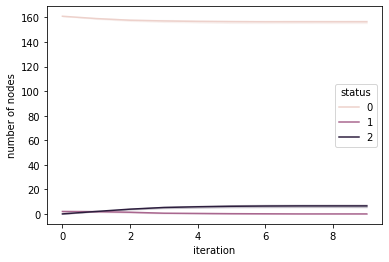

In [35]:
dfs = []
for _ in range(50):
    dfs.append(show_in_cas(ge, ['P. Kazienko', 'T. Kajdanowicz']))
sns.lineplot(data = pd.concat(dfs).reset_index(drop=True), x='iteration', y='number of nodes', hue='status')

In [130]:
def relabel(sir_nodes, n_labels=10):
    max_sir = max(sir_nodes, key=lambda x: x[1])[1]
    min_sir = min(sir_nodes, key=lambda x: x[1])[1]
    r = (float(max_sir) - min_sir) / n_labels 
    
    def label(count):
        return np.floor((count - min_sir) / r)
    
    return [(node, label(count)) for node, count in sir_nodes]

In [149]:
def collect_sir(gr, node, beta=0.1, gamma=1):
    model = ep.SIRModel(gr)

    # Model Configuration
    cfg = Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('gamma', gamma)
    cfg.add_model_initial_configuration("Infected", [node])
    model.set_initial_status(cfg)
    infected = []
    iterations = model.iteration_bunch(100)
    for it in iterations[1:]:
        for node, status in it['status'].items():
            if status == 1:
                infected.append(node)
    return len(infected)
    

In [175]:
def collect_sir_all(gr, beta=0.1, gamma=1):
    sir_per_node = []
    for node in tqdm(ge.nodes):
        influence = collect_sir(ge, node)
        sir_per_node.append((node, influence))
    rl = relabel(sir_per_node)
#     sns.histplot([x[1] for x in rl])
    return dict(rl)

In [176]:
runs = []
for _ in range(100):
    runs.append(collect_sir_all(ge))
df = pd.DataFrame(runs)
answer = dict(df.mean())
print(sorted(list(answer.items()), key=lambda x: x[1]))

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

[('H. Kwasnicka', 0.0), ('M. Przewozniczek', 0.0), ('P. Dziurzanski', 0.0), ('S. Zhao', 0.0), ('L. Indrusiak', 0.0), ('S. Feuerriegel', 0.0), ('M. Gniewkowski', 0.0), ('H. Maciejewski', 0.0), ('T. Surmacz', 0.0), ('Z. Michalewicz', 0.01), ('A. Krakovska', 0.01), ('J. Jakubik', 0.01), ('H. Budacova', 0.01), ('M. Holecyova', 0.01), ('A. Binding', 0.01), ('M. Paradowski', 0.01), ('K. Meissner', 0.01), ('W. Walentynowicz', 0.01), ('P. Myszkowski', 0.02), ('K. Oslizlo', 0.02), ('H. Steinacker', 0.02), ('R. Suszek', 0.02), ('K. Turzynski', 0.02), ('M. Spytkowski', 0.03), ('L. Olech', 0.03), ('M. Panfil', 0.03), ('E. Sessolo', 0.03), ('M. Skowronski', 0.04), ('J. Kwiatkowski', 0.04), ('S. Pokorski', 0.04), ('T. Jelinski', 0.04), ('S. Yankielowicz', 0.04), ('K. Gorman', 0.05), ('S. Theisen', 0.06), ('S. Rey', 0.06), ('Z. Lalak', 0.07), ('K. Kowalska', 0.07), ('O. Aharony', 0.08), ('J. Pawelczyk', 0.11), ('B. Czerny', 0.12), ('S. Wozniak', 0.12), ('J. Kuraszkiewicz', 0.13), ('M. Nikolajuk', 0.1

In [177]:
runs = []
for _ in range(100):
    runs.append(collect_sir_all(ge, gamma=0.8))
df = pd.DataFrame(runs)
answer = dict(df.mean())
print(sorted(list(answer.items()), key=lambda x: x[1]))

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

[('M. Przewozniczek', 0.0), ('P. Dziurzanski', 0.0), ('H. Budacova', 0.0), ('A. Binding', 0.0), ('J. Kwiatkowski', 0.0), ('K. Meissner', 0.0), ('M. Gniewkowski', 0.0), ('H. Maciejewski', 0.0), ('T. Surmacz', 0.0), ('W. Walentynowicz', 0.0), ('H. Kwasnicka', 0.01), ('M. Skowronski', 0.01), ('S. Zhao', 0.01), ('L. Indrusiak', 0.01), ('M. Holecyova', 0.01), ('Z. Lalak', 0.01), ('R. Suszek', 0.01), ('Z. Michalewicz', 0.02), ('K. Oslizlo', 0.02), ('A. Krakovska', 0.02), ('J. Jakubik', 0.02), ('S. Feuerriegel', 0.02), ('S. Rey', 0.02), ('E. Sessolo', 0.02), ('L. Olech', 0.03), ('Z. Ropka', 0.03), ('M. Paradowski', 0.03), ('T. Jelinski', 0.03), ('K. Kowalska', 0.03), ('M. Spytkowski', 0.04), ('H. Steinacker', 0.04), ('S. Yankielowicz', 0.04), ('P. Myszkowski', 0.05), ('S. Pokorski', 0.05), ('S. Theisen', 0.05), ('M. Panfil', 0.05), ('K. Turzynski', 0.06), ('O. Aharony', 0.07), ('M. Nikolajuk', 0.08), ('J. Pawelczyk', 0.1), ('R. Radwanski', 0.16), ('A. Borg', 0.17), ('H. Jegierski', 0.18), ('M

In [178]:
runs = []
for _ in range(100):
    runs.append(collect_sir_all(ge, gamma=0.6))
df = pd.DataFrame(runs)
answer = dict(df.mean())
print(sorted(list(answer.items()), key=lambda x: x[1]))

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

[('H. Budacova', 0.0), ('A. Binding', 0.0), ('J. Kwiatkowski', 0.0), ('M. Paradowski', 0.0), ('H. Steinacker', 0.0), ('M. Gniewkowski', 0.0), ('T. Surmacz', 0.0), ('W. Walentynowicz', 0.0), ('Z. Michalewicz', 0.01), ('K. Oslizlo', 0.01), ('M. Przewozniczek', 0.01), ('P. Dziurzanski', 0.01), ('L. Indrusiak', 0.01), ('S. Rey', 0.01), ('L. Olech', 0.02), ('S. Zhao', 0.02), ('A. Krakovska', 0.02), ('S. Feuerriegel', 0.02), ('S. Pokorski', 0.02), ('M. Panfil', 0.02), ('S. Yankielowicz', 0.02), ('H. Maciejewski', 0.02), ('M. Spytkowski', 0.03), ('H. Kwasnicka', 0.03), ('P. Myszkowski', 0.03), ('M. Skowronski', 0.03), ('J. Jakubik', 0.03), ('M. Holecyova', 0.03), ('Z. Lalak', 0.03), ('K. Turzynski', 0.03), ('K. Kowalska', 0.04), ('E. Sessolo', 0.05), ('S. Theisen', 0.06), ('T. Jelinski', 0.06), ('R. Suszek', 0.06), ('K. Meissner', 0.07), ('M. Nikolajuk', 0.09), ('O. Aharony', 0.11), ('N. Bisagno', 0.12), ('S. Wozniak', 0.13), ('B. Czerny', 0.14), ('P. Gramacki', 0.15), ('J. Pawelczyk', 0.17),

In [179]:
runs = []
for _ in range(100):
    runs.append(collect_sir_all(ge, gamma=0.4))
df = pd.DataFrame(runs)
answer = dict(df.mean())
print(sorted(list(answer.items()), key=lambda x: x[1]))

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

[('M. Przewozniczek', 0.0), ('P. Dziurzanski', 0.0), ('S. Zhao', 0.0), ('L. Indrusiak', 0.0), ('A. Krakovska', 0.0), ('J. Jakubik', 0.0), ('H. Budacova', 0.0), ('M. Holecyova', 0.0), ('S. Feuerriegel', 0.0), ('M. Gniewkowski', 0.0), ('H. Maciejewski', 0.0), ('T. Surmacz', 0.0), ('W. Walentynowicz', 0.0), ('M. Spytkowski', 0.01), ('Z. Michalewicz', 0.01), ('K. Oslizlo', 0.01), ('J. Kwiatkowski', 0.01), ('M. Paradowski', 0.01), ('L. Olech', 0.02), ('H. Kwasnicka', 0.02), ('P. Myszkowski', 0.02), ('M. Skowronski', 0.02), ('S. Theisen', 0.02), ('K. Meissner', 0.02), ('A. Binding', 0.03), ('H. Steinacker', 0.03), ('M. Panfil', 0.03), ('R. Suszek', 0.03), ('E. Sessolo', 0.03), ('T. Jelinski', 0.04), ('S. Rey', 0.04), ('K. Kowalska', 0.04), ('O. Aharony', 0.04), ('Z. Lalak', 0.05), ('S. Pokorski', 0.05), ('S. Yankielowicz', 0.05), ('K. Turzynski', 0.07), ('J. Pawelczyk', 0.08), ('J. Hamari', 0.12), ('B. Czerny', 0.14), ('M. Nikolajuk', 0.14), ('K. Kania', 0.15), ('K. Gorman', 0.16), ('A. Jama

In [ ]:
subgraphs = sorted(nx.connected_components(ge), key=len, reverse=True)

ge_biggest_comp = ge.subgraph(subgraphs[0])
plt.figure(figsize=(18, 9))
pos = nx.spring_layout(ge_biggest_comp)
nx.draw(ge_biggest_comp, pos=pos, node_size=50)
plt.show()

In [196]:
import importlib
import clustering.hcs as hcs
importlib.reload(hcs)

<module 'clustering.hcs' from 'C:\\Users\\Tom\\Documents\\studia\\ComplexNetworkAnalysis\\clustering\\hcs.py'>

In [211]:
ge_biggest_comp_cpy = ge_biggest_comp.copy()
_G, sub_graphs  = hcs.labelled_HCS(ge_biggest_comp_cpy)
